#### IMPORTAÇÃO DAS BIBLIOTECAS

In [73]:
# DEFINIÇÃO DA SEMENTE ALEATÓRIA
import random
from datetime import datetime
st = datetime.now()

random.seed(42)
seed = 42

# IMPORTAÇÃO DOS PACOTES PARA A MANIPULAÇÃO DE DADOS
import pandas as pd
pd.options.display.max_rows = 250

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder


# IMPORTAÇÃO DOS PACOTES PARA A MODELAGEM DE DADOS
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# IMPORTAÇÃO DOS PACOTES PARA A AVALIAÇÃO DE PERFORMANCE DOS MODELOS
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, classification_report, f1_score

### IMPORTAÇÃO DA BASE PARA TRATAMENTO

In [35]:
# LEITURA DO ARQUIVO 'WINE'
wines = pd.read_csv('winequality-red.csv', sep=';')

print('Número de linhas e colunas carregados: ', wines.shape)
attributes = list(wines.columns)

wines.head(3)

Número de linhas e colunas carregados:  (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5


In [3]:
attributes

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

#### EXPLORATÓRIA DA BASE

In [4]:
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
wines.isnull().sum().sort_values(ascending=False)

quality                 0
alcohol                 0
sulphates               0
pH                      0
density                 0
total sulfur dioxide    0
free sulfur dioxide     0
chlorides               0
residual sugar          0
citric acid             0
volatile acidity        0
fixed acidity           0
dtype: int64

In [6]:
qualidade = wines.groupby('quality')['quality'].count().to_frame(name='FREQ').reset_index()

print('Os vinhos podem ser categorizados em', qualidade.shape[0], 'níveis de qualidade')
print('Temos como distribuição entre os níveis de qualidade os seguintes valores: \n\n', qualidade)

Os vinhos podem ser categorizados em 6 níveis de qualidade
Temos como distribuição entre os níveis de qualidade os seguintes valores: 

    quality  FREQ
0        3    10
1        4    53
2        5   681
3        6   638
4        7   199
5        8    18


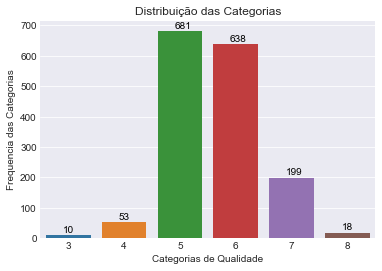

In [43]:
%matplotlib inline

sns.countplot(x = 'quality', data=wines)
plt.title('Distribuição das Categorias')
plt.xlabel('Categorias de Qualidade')
plt.ylabel('Frequencia das Categorias')

for posicao, valor in zip(qualidade['quality'], qualidade['FREQ']):
    plt.text(posicao-3.1, valor+10, str(valor), color='black')
    
plt.show()



In [44]:
bins = (min(wines['quality'])-1, 6.5, max(wines['quality']))
labels = ['bad', 'good']

wines['quality'] = pd.cut(x = wines['quality'], bins=bins, labels=labels)

print(wines.groupby('quality')['quality'].count().to_frame(name='FREQ').reset_index())

wines['quality'] = LabelEncoder().fit_transform(wines['quality'])

target = wines.groupby('quality')['quality'].count().to_frame(name='FREQ').reset_index()

print('\nOs vinhos podem ser categorizados em', target.shape[0], 'níveis de qualidade')
print('Temos como distribuição entre os níveis de qualidade os seguintes valores: \n\n')
target


quality  FREQ
0     bad  1382
1    good   217

Os vinhos podem ser categorizados em 2 níveis de qualidade
Temos como distribuição entre os níveis de qualidade os seguintes valores: 




,quality,FREQ
0,0,1382
1,1,217


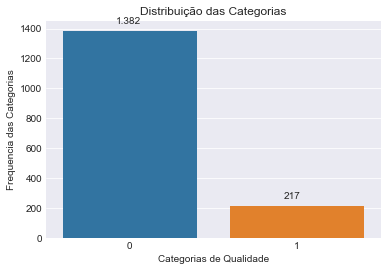

In [45]:
ax = sns.countplot(wines['quality'])
plt.title('Distribuição das Categorias')
plt.xlabel('Categorias de Qualidade')
plt.ylabel('Frequencia das Categorias')

for p in ax.patches:
        ax.annotate('{:,.0f}'.format(p.get_height()).replace(',','.'), (p.get_x()+0.32, p.get_height()+50))

In [10]:
def detecta_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    matches = ((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr)))
    return df[matches.any(axis=1)]

In [11]:
def detecta_outliers2(df, variable):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)
    iqr = q3 - q1
    matches = ((df[variable] < (q1 - 1.5 * iqr)) | (df[variable] > (q3 + 1.5 * iqr)))
    return df.loc[matches, variable]

In [12]:
def variableOutlier():
    for variavel in attributes:
        if variavel != 'quality':
            print(50*'=')
            print(detecta_outliers2(wines, variavel).describe().to_frame(name=variavel).reset_index())
    
    print(50*'=')

In [13]:
outliers = detecta_outliers(wines)
print('Foram classificados como Outliers o total de', outliers.shape[0], 'registros (utilizando a regra IQR), sendo que os mesmos não foram removidos para não descaracterizar a base.\n')
variableOutlier()

Foram classificados como Outliers o total de 552 registros (utilizando a regra IQR), sendo que os mesmos não foram removidos para não descaracterizar a base.

   index  fixed acidity
0  count      49.000000
1   mean      13.287755
2    std       0.998881
3    min      12.400000
4    25%      12.600000
5    50%      12.900000
6    75%      13.500000
7    max      15.900000
   index  volatile acidity
0  count         19.000000
1   mean          1.132105
2    std          0.148738
3    min          1.020000
4    25%          1.030000
5    50%          1.070000
6    75%          1.182500
7    max          1.580000
   index  citric acid
0  count          1.0
1   mean          1.0
2    std          NaN
3    min          1.0
4    25%          1.0
5    50%          1.0
6    75%          1.0
7    max          1.0
   index  residual sugar
0  count      155.000000
1   mean        5.882903
2    std        2.504726
3    min        3.700000
4    25%        4.200000
5    50%        5.200000
6    75% 

In [14]:
# from datetime import datetime
# st = datetime.now()
# import seaborn as sns
# %matplotlib inline

# sns.pairplot(wines)
# plt.show()
# en = datetime.now()
# print(en-st)

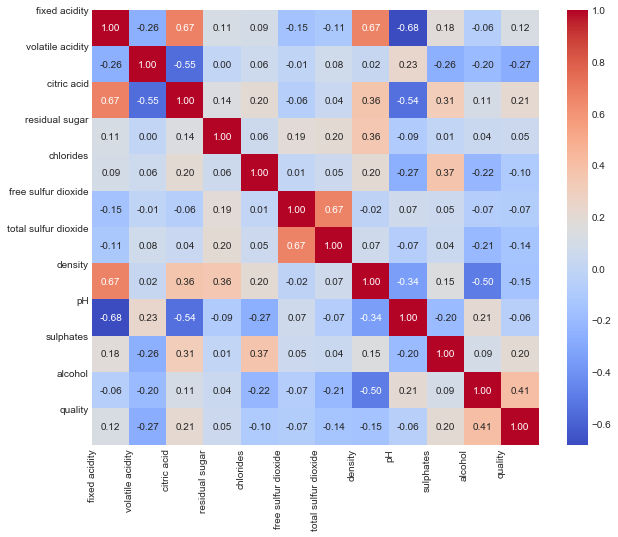

In [15]:
corr = wines.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()



In [16]:
wines_np = wines.to_numpy()
nrow,ncol = wines_np.shape
X = wines_np[:,0:ncol-1]
y = wines_np[:,-1]


In [17]:
print('Dados antes da transformação:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

print(100*'-')
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

print('Dados transformados:')
print('Media: ', np.mean(X, axis = 0))
print('Desvio Padrao:', np.std(X, axis = 0))

Dados antes da transformação:
Media:  [ 8.31963727  0.52782051  0.27097561  2.5388055   0.08746654 15.87492183
 46.46779237  0.99674668  3.3111132   0.65814884 10.42298311]
Desvio Padrao: [1.74055180e+00 1.79003704e-01 1.94740214e-01 1.40948711e+00
 4.70505826e-02 1.04568856e+01 3.28850367e+01 1.88674370e-03
 1.54338181e-01 1.69453967e-01 1.06533430e+00]
----------------------------------------------------------------------------------------------------
Dados transformados:
Media:  [ 3.55493551e-16  1.73303106e-16 -8.88733878e-17 -1.24422743e-16
  3.91042906e-16 -6.22113715e-17  4.44366939e-17  2.36403212e-14
  2.86172309e-15  6.75437748e-16  1.06648065e-16]
Desvio Padrao: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [18]:
p = 0.2 # fraction of elements in the test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = p, random_state = seed)

In [19]:
print('Base de Treinamento - X: ', x_train.shape)
print('Base de Treinamento - Y: ', y_train.shape)

print('Base de Teste - X: ', x_test.shape)
print('Base de Teste - Y: ', y_test.shape)

Base de Treinamento - X:  (1279, 11)
Base de Treinamento - Y:  (1279,)
Base de Teste - X:  (320, 11)
Base de Teste - Y:  (320,)


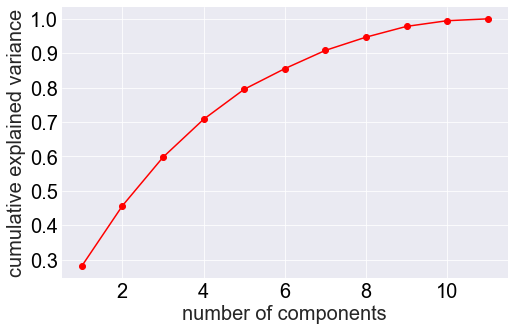

In [20]:
n_components_values = np.arange(1, len(attributes))

# instanciamos o PCA sem especificar o numero de componentes que desejamos
# em seguida ajustamos ao nosso conjunto de dados
pca = PCA().fit(X)

# mostra a variância acumulada para todos os possiveis numeros de componentes
# Notamos que com apenas duas variaveis conseguimos explicar 95% da variancia dos dados
plt.figure(figsize=(8, 5))
plt.plot(n_components_values, np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('number of components', fontsize=20)
plt.ylabel('cumulative explained variance', fontsize=20);
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.grid(True)
plt.show(True)

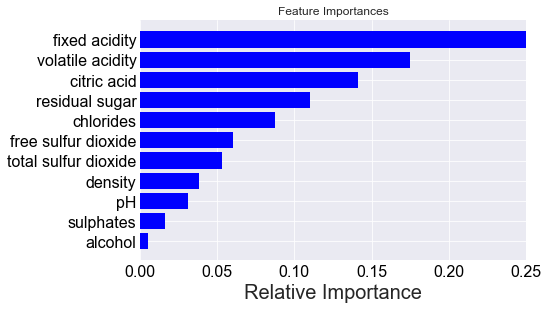

In [21]:
var_exp = pca.explained_variance_ratio_

importances = var_exp
indices = np.argsort(importances)
attributes_rank = []
for i in indices:
    attributes_rank.append(attributes[i])
plt.title('Feature Importances')
plt.tight_layout()
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), attributes_rank, fontsize=20)
plt.xlabel('Relative Importance',fontsize=20)
plt.xticks(color='k', size=16)
plt.yticks(color='k', size=16)
plt.xlim([0.0, 0.25])
plt.show()

In [22]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

BEST K: 1 
 
AUC: 0.78 
ACCURACY: 0.89 
PRECISION SCORE: 0.77


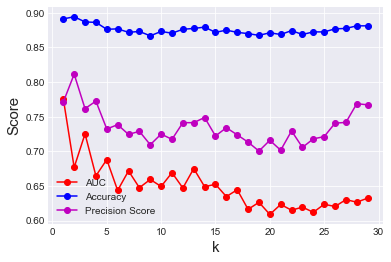

In [77]:
mauc = []
macc = []
mprc = []
vk = []

for k in range(1, 30):
    vauc = []
    vacc = []
    vprc = []

    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test) 
        
        vauc.append(roc_auc_score(y_test, y_pred))
        vacc.append(accuracy_score(y_pred, y_test))
        vprc.append(precision_score(y_test, y_pred, average='macro'))

    macc.append(np.mean(vacc))
    mauc.append(np.mean(vauc))
    mprc.append(np.mean(vprc))
    vk.append(k)

best_k = np.argmax(mauc)+1
print('BEST K:', best_k, '\n',\
    '\nAUC:', round(mauc[best_k-1], 2), \
    '\nACCURACY:', round(macc[best_k-1], 2), \
    '\nPRECISION SCORE:', round(mprc[best_k-1],2))

# plt.figure(figsize=(10,5))
plt.plot(vk, mauc, '-ro', label= 'AUC')
plt.plot(vk, macc, '-bo', label = 'Accuracy')
plt.plot(vk, mprc, '-mo', label = 'Precision Score')
plt.xlabel('k', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

In [61]:
model = KNeighborsClassifier(n_neighbors=1, metric = 'euclidean')
model.fit(x_train,y_train)
y_pred = model.predict(x_test) 

print('Accuracy:', round(accuracy_score(y_pred, y_test),2))
print('F1 score:', round(f1_score(y_test, y_pred, average="macro"),2))
print('Precision:', round(precision_score(y_test, y_pred, average="macro"),2))
print('Recall:', round(recall_score(y_test, y_pred, average="macro"), 2))

Accuracy: 0.9
F1 score: 0.78
Precision: 0.78
Recall: 0.78


Melhor n: 51  com acurácia: 0.9433962264150944  e precisão: 0.8953900709219859


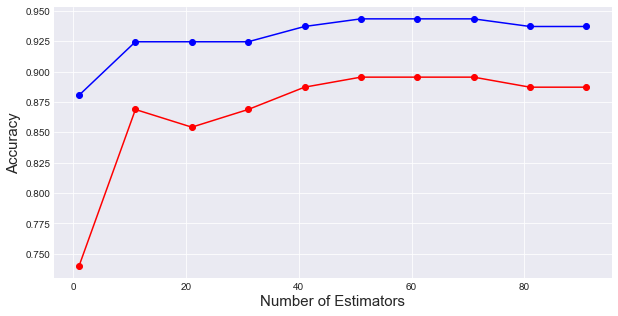

In [86]:
vscore = []
pscore = []
vn = []

for n in range(1,100,10):
    
    model = RandomForestClassifier(n_estimators=n, random_state=seed)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test) 
    
    score = accuracy_score(y_pred, y_test)
    precision = precision_score(y_test, y_pred, average='macro')
    
    # print('Number of Estimators:', n, 'Accuracy:', score)
    pscore.append(precision)
    vscore.append(score)
    vn.append(n)

best_n = vn[np.argmax(vscore)]
print('Melhor n:', best_n, ' com acurácia:', vscore[np.argmax(vscore)], ' e precisão:', pscore[np.argmax(pscore)] )

plt.figure(figsize=(10,5))
plt.plot(vn, vscore, '-bo')
plt.plot(vn, pscore, '-ro')
plt.xlabel('Number of Estimators', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)
plt.show()


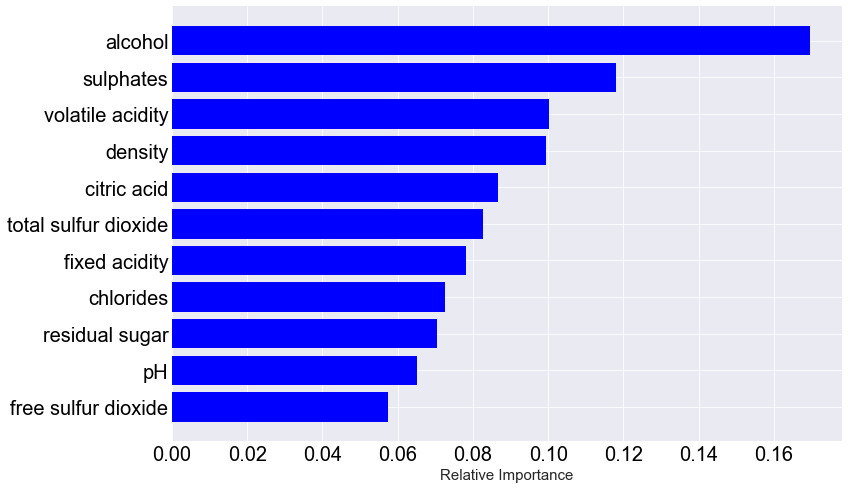

In [88]:
importances = model.feature_importances_
indices = np.argsort(importances)
lmeas_order = []
for i in indices:
    lmeas_order.append(attributes[i])
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), lmeas_order, fontsize=15)
plt.xlabel('Relative Importance',fontsize=15)
plt.xticks(color='k', size=20)
plt.yticks(color='k', size=20)
plt.show()

In [89]:
model = tree.DecisionTreeClassifier(criterion = 'entropy',random_state = seed)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print('Accuracy (Decision Tree): \t{}'.format(model.score(x_test, y_test)))

Accuracy (Decision Tree): 	0.8805031446540881


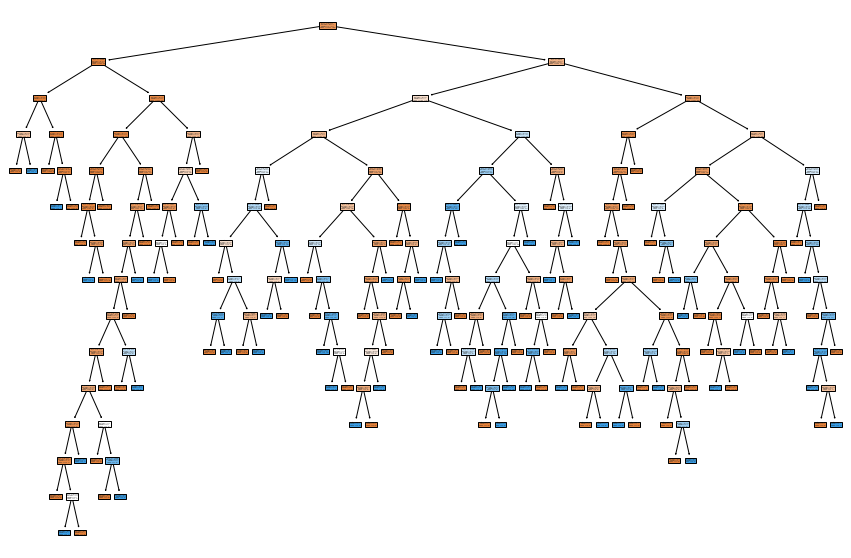

In [90]:
plt.figure(figsize=(15,10))
tree.plot_tree(model.fit(x_train,y_train),filled=True)
plt.show(True)

In [81]:
models = [
    ('Naive Bayes - Gaussian', GaussianNB()),
    ('Naive Bayes - Bernoulli', BernoulliNB())
]

for name, model in models:
    model.fit(x_train, y_train)
    print('Accuracy ({}): \t{}'.format(name, model.score(x_test, y_test)))

Accuracy (Naive Bayes - Gaussian): 	0.8805031446540881
Accuracy (Naive Bayes - Bernoulli): 	0.8553459119496856


In [82]:
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

In [84]:
sacc = []
sauc = []
vc = []
for c in range(1, 30):
    sauc = []
    sacc = []
    for train_index, test_index in cv.split(X, y):
        # select rows
        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = SVC(C = c, gamma = 'auto', random_state=seed)
        model.fit(x_train,y_train)
        y_pred = model.predict(x_test) 
        score = accuracy_score(y_pred, y_test)

        sauc.append(roc_auc_score(y_test, y_pred))
        sacc.append(accuracy_score(y_pred, y_test))
    sacc.append(np.mean(sacc))
    sauc.append(np.mean(sauc))
    vc.append(c)

best_c = np.argmax(sauc)+1
print('Melhor c:', best_c, ' AUC:',sauc[best_c-1])
plt.figure(figsize=(10,5))
# plt.plot(vc, sauc, '-ro', label= 'AUC')
plt.plot(vc, sacc, '-bo', label = 'Accuracy')
plt.xlabel('c', fontsize = 15)
plt.ylabel('Score', fontsize = 15)
plt.legend()
plt.show()

Melhor c: 10  AUC: 0.8975155279503106


ValueError: x and y must have same first dimension, but have shapes (29,) and (11,)

In [24]:
en = datetime.now()
print(en-st)

0:00:32.445831
